<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
 <p></p>
 <br/>
		<div align=center>
		    <size=6>
			    <br />
Practical Assignment 2- part 2
              <font color=blue size=6>
            	<br/>
              Genetic Algorithm
			</font>
    <br/>
    <br/>
 </div>
<hr/>
Artifical Intelligence - Dr. GholamReza GhassemSani
</font>
  <p></p>
 <br/>
Sharif University of Technology
<p></p>
Spring 2022


<br/>
<br/>
<font size=4 color=red>
 </font>
                <br/>
    </div>

# Personal Data

In [1]:
# Set your student number
student_number = 98110073
Name = fareed
Last_Name = fotuhi

# Rules
- Make sure that all of your cells are able to run perfectly. 
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**. 
- There is one cell for your custom functions (if you need any) at the beginning of each question. Please note that this jupyter file might be broken down into 3 or 4 jupyter notebooks for easier grading, so you **must write your custom functions in the correct cell**.

Due date: 15/2/1401 (at 11:59pm)<br>
You are free to collaborate but solutions must be written up individually.
Collaborators must be acknowledged.<br>
Submissions with more than 100 hours delay will not be graded.<br>Submissions with less than
50 hours delay will be penalized by the following rule:<br>
Penalized mark = M * (100 – D) / 100 <br>
Where M = the mark achieved from your solution and D is number of hours passed the
deadline. Submissions with 50 < X ≤ 100 hours delay will be penalized by P.M. = M * 0.5.<br>
Submit your answers on quera.

# Q1: GA

<font size=4>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Libraries

In [3]:
import numpy as np
from math import exp
import random
import matplotlib.pyplot as plt
import math

## Knapspack Problem  ( 30 Points )

In [34]:
# place for your custom functions here

In this problem, we will tackle the knapspack problem with a genetic algorithm. You can find more detail about this problem [here](https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/).


To use local search algorithms, we must define our state-space. As the problem is about choosing a object or not, we define each state as a vector $S$ of size $n$ ( $n$ is total number of objects). 

$$
S_i=   \left\{
\begin{array}{ll}
      0 & \text{object $i$ is selected} \\
      1 & \text{object $i$ is not selected}
\end{array} 
\right.
$$

Write a function that generates a random state. i.e., it must return a boolean vector of size  𝑛
n.

In [4]:
def random_state_generator(n):
    ##################################################################
    # (1 Points)                                                     #
    # This function get input n (length)                             #
    # and generates and returns a random boolean vector (list)       #
    # as described above                                             #
    ##################################################################
    return [np.random.randint(2) for i in range(n)]


## Population Generation

The first step of the genetic algorithm is to generate an initial population of different states (chromosomes).

Complete the following function. It must generate a population of size $k$ for a knapspack with $n$ objects.

In [5]:
def population_generation(n, k): 
    ###################################################################
    # (1 Points)                                                      #
    # Returns a population of size k for a knapspack with n objects   #
    ###################################################################
    return [random_state_generator(n) for i in range(k)]

## Fitness Function

Our Proposed fitness function is:

$$
f(S) =   \left\{
\begin{array}{ll}
      \sum_{i=1}^{n} s_{i} v_{i} & \text{if  $\sum_{i=1}^{n} s_{i} w_{i} \leq W $ } \\
      0 & \text{Otherwise}
\end{array} 
\right.
$$

Note that: 

n = chromosome length 

$s_i$ = ith gene of state S

$v_i$ = ith value 

$w_i$ = ith weight 

$W$ = knapsack weight 



In [6]:
def fitness_function(W, weights, values, state):
    ##################################################################
    # (3 Points)                                                     #
    # This function gets a state and values and weights and W,       #
    # and calculates the fitness of this state                       #
    ##################################################################
    v=np.sum(state*np.array(values))
    w=np.sum(state*np.array(weights))
    if w<=W:
        fitness=v
    else:
        fitness=0
    return fitness
    
    

## Selection


We select the best chromosomes (states) in the selection phase and allow them to pass to the next generation (iteration). Others will be discarded.

For this part, we use a procedure named "tournament selection". In this procedure, we divide match each element in population with another one and compare their fitness. The winner is the one that has a higher fitness, and it gets selected for the next part, and the others are discarded.

In [7]:
def tournament_selection(W, weights, values, population):
    ######################################################################
    # (5 Points)                                                         #
    # This function gets the population and values and weights and W,    #
    # and generates and returns a new population using                   #
    # tournament selection                                               #
    ######################################################################
    population_copy=population.copy()
    matches=[]
    for i in range(int(len(population)/2)):
        match=[]
        for i in range(2):
            match.append(population_copy.pop(random.randint(0,len(population_copy)-1)))
        matches.append(match)

    
    new_populatin=[]
    
    for tournament in matches:
        fitness_list=[]
        for i in range(2):
            fitness_list.append(fitness_function(W,weights,values,tournament[i]))
        new_populatin.append(tournament[fitness_list.index(max(fitness_list))])
    return new_populatin

## Crossover

In the crossover phase, we combine two chromosomes to get a better chromosome (solution). There are lots of ways to implement crossover. For this problem, we propose this method:

Take two chromosomes as input. Generate a random 'index'. The resulting chromosome consists of genes from chromosome1 from 0 up until 'index' and genes from chromosome2 from 'index+1' until the end. Another chromosome is generated by swapping chromosome1 and chromosome2 and doing the same procedure.

If you think another crossover method can result in better you can use it. Just explain your method too.

In [8]:
def crossover(parent1, parent2):
    ##################################################################
    # (5 Points)                                                     #
    # This function gets the two parents                             #
    # and generates and returns two new childs using crossover       #
    ##################################################################
    index=random.randint(0,len(parent1))
    cross = [*parent1[:index], *parent2[index:]]
    return cross

## Mutation

For this part, we generate a random number. If this number is greater than the mutation probability, we randomly select one index from genes that are selected and one from genes that are not selected and change these two from '0' to '1' or '1' to '0'.

If you think another mutation method can result in better you can use it. Just explain your method too.

In [14]:
def mutation(chromosme, probability):
    ##################################################################
    # (3 Points)                                                     #
    # This function gets the chromosome, and mutation probabiltiy    #
    # and generate a new chromosome using mutation                   #
    ##################################################################
    random_value = random.random()
    if random_value < probability:
        int1_random_value = random.randint(0,len(chromosme)-1)   
        index_list = list(range(len(chromosme)))
        del index_list[int1_random_value]
        int2_random_value= random.choice(index_list)
        chromosme[int1_random_value],chromosme[int2_random_value]=chromosme[int2_random_value],chromosme[int1_random_value]
    return chromosme   

## Main Algorithm

Now implement the main 'genetic_algorithm' function and plot the best fitness changes over generations.

In [30]:
fitness_list = []
# solutions=[]
def genetic_algorithm(W, weights, values, mutation_probability=0.1, pop_size=100, max_generation=100):
    ###################################################################################
    # (8 Points)                                                                      #
    # The main genetic algorithm function                                             #
    # it gets and values and weights and W, as mandatory input and                    #
    # mutation probability, population size and maximum generation as optional input  #
    # And runs the algorithm and returns the best solution and best fitness           #
    ###################################################################################
    #best_fitness = float('-inf')
    #best_solution = None
    n = len(weights)
    print(n)
    ##################
    solutions=[]
    for i in range(max_generation):
        if i==0:
            population_gen=population_generation(n,k=pop_size)
        else : 
            pass

        
        print(f"size_gen:{len(population_gen)}")
        selected_pop=tournament_selection(W,weights,values,population_gen)
        print(f"size_gen_after_tour:{len(selected_pop)}")
        selected_pop_copy=selected_pop.copy()
        cross_matches=[]
        for a in range(int(len(selected_pop)/2)):
            match=[]
            for b in range(2):
                match.append(selected_pop_copy.pop(random.randint(0,len(selected_pop_copy)-1)))
            cross_matches.append(match)
            
        for cross in cross_matches:
            selected_pop.append(crossover(cross[0],cross[1]))
            selected_pop.append(crossover(cross[1],cross[0]))
        print(f"size_gen_after_cross:{len(selected_pop)}")
        
        for i in range(len(selected_pop)):
            chromosme=selected_pop[i]
            chromosme=mutation(chromosme,mutation_probability)
        
        fitness_lst=[]
        for s in selected_pop:
            fitness_lst.append(fitness_function(W,weights,values,s))
        best_fit=max(fitness_lst)
        print(best_fit)
        fitness_list.append(best_fit)
        
        best_solution_gen=selected_pop[fitness_lst.index(best_fit)]
        solutions.append(best_solution_gen)
        population_gen=selected_pop
        
        
    best_fitness=max(fitness_list)
    best_solution=solutions[fitness_list.index(best_fitness)]
        
    
    
    ##################
    return best_fitness, best_solution

In [31]:
weights = [random.randint(0, 50) for _ in range(100)]
values = [random.randint(0, 70) for _ in range(100)]
W = 1000
best_fitness , best_sol = genetic_algorithm(W, weights, values)
print(f'best fitness: {best_fitness}')
print(f'weight used: {np.dot(best_sol, weights)}')

# Note that at least you must reach 2200 fitness in almost runs if your implemention is good enough.

100
size_gen:100
size_gen_after_tour:50
size_gen_after_cross:100
1466
size_gen:100
size_gen_after_tour:50
size_gen_after_cross:100
1466
size_gen:100
size_gen_after_tour:50
size_gen_after_cross:100
1466
size_gen:100
size_gen_after_tour:50
size_gen_after_cross:100
1466
size_gen:100
size_gen_after_tour:50
size_gen_after_cross:100
1528
size_gen:100
size_gen_after_tour:50
size_gen_after_cross:100
1528
size_gen:100
size_gen_after_tour:50
size_gen_after_cross:100
1528
size_gen:100
size_gen_after_tour:50
size_gen_after_cross:100
1528
size_gen:100
size_gen_after_tour:50
size_gen_after_cross:100
1528
size_gen:100
size_gen_after_tour:50
size_gen_after_cross:100
1528
size_gen:100
size_gen_after_tour:50
size_gen_after_cross:100
1573
size_gen:100
size_gen_after_tour:50
size_gen_after_cross:100
1596
size_gen:100
size_gen_after_tour:50
size_gen_after_cross:100
1650
size_gen:100
size_gen_after_tour:50
size_gen_after_cross:100
1650
size_gen:100
size_gen_after_tour:50
size_gen_after_cross:100
1650
size_g

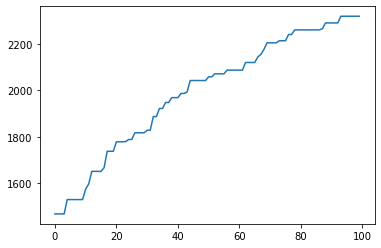

In [33]:
###################################################
# (4 Points)                                      #
# Plot the best fitness changes over generations. #
###################################################
plt.plot(fitness_list)